In [1]:

'''
解决汉字乱码问题
'''
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False


# 1. 加载数据
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"{os.path.basename(file_path)} 加载成功")
        return data
    except Exception as e:
        print(f"{os.path.basename(file_path)} 加载失败:", e)
        return None


# 2. 数据清理
def clean_data(data):
    # 检查缺失值
    missing_data = data.isnull().sum()
    print("缺失值统计:\n", missing_data[missing_data > 0])

    # 检查重复值
    duplicates = data.duplicated().sum()
    print("重复值数量:", duplicates)

    return data


file_paths = {
    "用户行为表": "电商平台行为数据表/用户行为表.csv",
    "用户表": "电商平台行为数据表/用户表.csv",
    "用户评论表": "电商平台行为数据表/用户评论表.csv",
    "用户购买信息表": "电商平台行为数据表/用户购买信息表.csv",
    "订单表": "电商平台行为数据表/订单表.csv"
}
# 加载各个CSV文件
user_behavior = load_data(file_paths["用户行为表"])
user_info = load_data(file_paths["用户表"])
user_comments = load_data(file_paths["用户评论表"])
purchase_info = load_data(file_paths["用户购买信息表"])
orders = load_data(file_paths["订单表"])

用户行为表.csv 加载成功
用户表.csv 加载成功
用户评论表.csv 加载成功
用户购买信息表.csv 加载成功
订单表.csv 加载成功


In [2]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单编号    21897 non-null  int64  
 1   标题      21897 non-null  object 
 2   价格      21897 non-null  float64
 3   购买数量    21897 non-null  int64  
 4   外部系统编号  21897 non-null  object 
 5   商品属性    12636 non-null  object 
 6   套餐信息    0 non-null      float64
 7   备注      130 non-null    object 
 8   订单状态    21897 non-null  object 
 9   商家编码    21897 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,12,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00,20,HT-5H0094,NaN,NaN,NaN,交易成功,HT-5H0094
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20,16,GC018005,NaN,NaN,NaN,交易成功,GC018005
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00,10,HT-7H0093,NaN,NaN,NaN,交易成功,HT-7H0093
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79,1,GC080003,套餐类型：标准配置;颜色分类：33000蓝色水枪,NaN,NaN,交易成功,GC080003


In [3]:
orders_with_comments = orders[orders['备注'].notna() & (orders['备注'] != '')]

# 输出结果
'''
打印出有备注的订单
'''
orders_with_comments

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
29,21385360876390000,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.85,60,SJQ-DS0071,颜色分类：带绳水晶球5.5CM,NaN,掌柜，记得补3个球,交易成功,SJQ-DS0071
404,24115289204222300,创意电动玩具仿真拉磨小马儿童好玩的小孩礼物地摊货免邮玩具批发,8.55,1,GC035010,颜色分类：红色拉磨小马;大小描述：均码,NaN,不要放任何发货清单和与产品有关的宣传页。,交易成功,GC035010
416,24084568809650300,儿童电子琴音乐电动早教益智琴婴幼儿小钢琴玩具男孩女孩1-3-6岁,4.90,4,GC070003,颜色分类：爱心卡通音乐琴,NaN,请按默认地址发货。,交易成功,GC070003
800,20895260324556900,六一儿童节男孩礼物创意新款电动发光音乐投影枪地摊玩具货源批发,4.90,10,GC086001,颜色分类：蓝色电动枪（不带投影）,NaN,请开收据，谢谢！另外黄色与蓝色各一半,交易成功,GC086001
838,20925381649968600,四通遥控车电动玩具汽车模型遥控赛车警车赛车儿童益智玩具车男孩,12.90,1,489A0355,颜色分类：489A二通遥控车;套餐类型：选好款式，颜色随机,NaN,要红色！,交易成功,489A0355
...,...,...,...,...,...,...,...,...,...,...
21189,13427810918491400,学步玩具大鸭子儿童手推车 婴儿宝宝手推杆玩具儿童地摊货源批发,1.85,2,GC029003,颜色分类：小鸭子手推车,NaN,邮政,交易成功,GC029003
21201,13417648559491400,创意发光极速弹射陀螺闪光陀螺玩具 义乌小商品夜市地摊货源批发,1.85,1,1699A-30188,颜色分类：极速陀螺,NaN,邮政,交易成功,1699A-30188
21202,13441349401491400,创意仿木陀螺七彩发光音乐男孩闪光玩具儿童夜市热卖地摊货源批发,3.99,10,999FMTL0134,NaN,NaN,邮政,交易成功,999FMTL0134
21203,13440289977491400,创意闪光棒七彩发光棒 夜市热卖地摊货源新奇特玩具发光玩具批发,2.98,5,216FGB0506,NaN,NaN,邮政,交易成功,216FGB0506


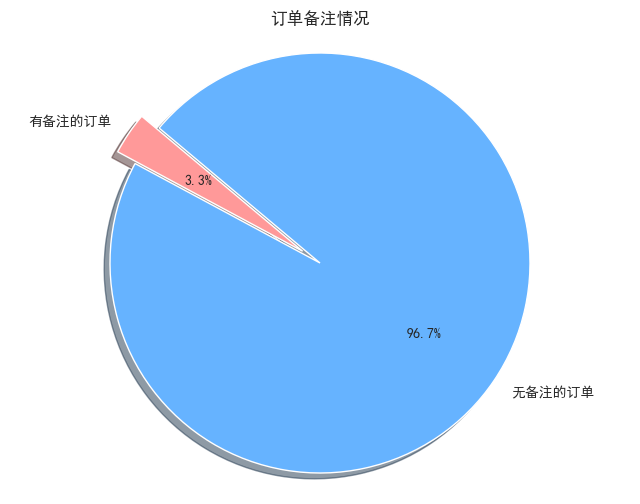

总订单数: 3989
有备注的订单数: 130


In [4]:
total_orders = orders['订单编号'].nunique()
orders_with_comments_count = orders_with_comments['订单编号'].nunique()

# 绘制饼图
labels = ['有备注的订单', '无备注的订单']
sizes = [orders_with_comments_count, total_orders - orders_with_comments_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 仅“有备注的订单”突出

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('订单备注情况')
plt.axis('equal')  
plt.show()

# 输出统计信息
print(f'总订单数: {total_orders}')
print(f'有备注的订单数: {orders_with_comments_count}')

In [5]:
#总销售额和订单数
total_orders = orders['订单编号'].nunique()
total_sales = (orders['价格'] * orders['购买数量']).sum()

print(f'总订单数: {total_orders}')
print(f'总销售额: {total_sales}')

总订单数: 3989
总销售额: 315226.43


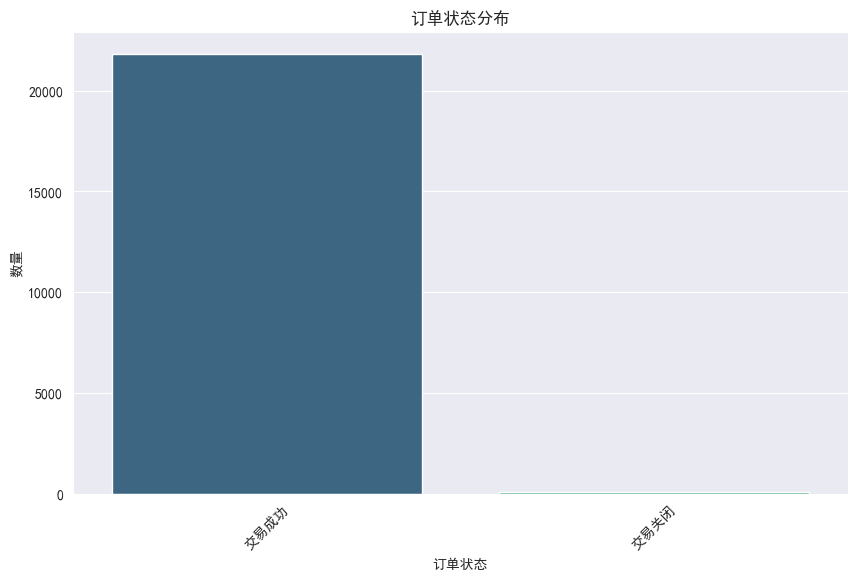

交易成功的订单数: 3989
已关闭的订单数: 27
交易失败率为：0.6768613687641012%
转化率为：99.32313863123589%


In [6]:
# 订单状态分布
order_status_counts = orders['订单状态'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')
plt.title('订单状态分布')
plt.xlabel('订单状态')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.show()
successful_orders_count = orders[orders['订单状态'] == '交易成功']['订单编号'].nunique()
closed_orders_count = orders[orders['订单状态'] == '交易关闭']['订单编号'].nunique()

# 输出结果
print(f'交易成功的订单数: {successful_orders_count}')
print(f'已关闭的订单数: {closed_orders_count}')
print(f'交易失败率为：{closed_orders_count/total_orders*100}%')
print(f'转化率为：{100-closed_orders_count/total_orders*100}%')